In [1]:
#In this code, I will be trying to improve the Logistic Regression accuracy score that I got without any feature engineering or model optimization.
#The accuracy score to beat is 0.886.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
import math
from scipy import stats
import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
df = pd.read_csv('cleaned_wine_data.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000
mean,8.311201,0.529816,0.271732,2.514886,0.088180,15.861459,46.477155,0.996714,3.310228,0.658924,10.429563,0.134119
std,1.738199,0.182954,0.195052,1.334976,0.049392,10.421941,32.171729,0.001865,0.154722,0.170697,1.080481,0.340906
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,165.000000,1.003690,4.010000,2.000000,14.900000,1.000000


In [6]:
X = df.drop(['quality'], axis=1)
Y = df['quality']

In [7]:
X_raw = df.drop(['quality'], axis=1)
Y = df['quality']

In [8]:
scaler = StandardScaler()

X = scaler.fit_transform(X_raw)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.2)

In [9]:
def modelaccuracy(model):
    model.fit(X_train, Y_train)
    result = accuracy_score(Y_test, (model.predict(X_test)))
    print(f'Model Accuracy is {result}')

In [10]:
#The base accuracy score without any changes.

lr = LogisticRegression(random_state=42)

modelaccuracy(lr)

Model Accuracy is 0.8860294117647058


First I will check for Linearity of independent variables and log-odds

In [11]:
logit_df = df.copy()

In [12]:
logit_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000
mean,8.311201,0.529816,0.271732,2.514886,0.088180,15.861459,46.477155,0.996714,3.310228,0.658924,10.429563,0.134119
std,1.738199,0.182954,0.195052,1.334976,0.049392,10.421941,32.171729,0.001865,0.154722,0.170697,1.080481,0.340906
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,165.000000,1.003690,4.010000,2.000000,14.900000,1.000000


In [13]:
#Dropping any 'citric acid' == 0 values. These will not work with the logit.

logit_df.drop(logit_df.loc[logit_df['citric acid'] == 0].index, inplace=True)

In [14]:
X_logit = logit_df.drop(['quality'], axis=1)
Y_logit = logit_df['quality']

In [15]:
#Making new columns for the logit transformation.

for var in X_logit.columns:
    logit_df[f'Log_{var}'] = logit_df[var].apply(lambda x: x * np.log(x))

In [16]:
#Here I am checking to see if any of the logit columns are statistically significant (P < 0.001).

X_logit = logit_df.drop(['quality'], axis=1)
Y_logit = logit_df['quality']

logit_results = GLM(Y_logit, X_logit, family=families.Binomial()).fit()
print(logit_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                quality   No. Observations:                 1239
Model:                            GLM   Df Residuals:                     1217
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -322.47
Date:                Thu, 18 Jul 2024   Deviance:                       644.95
Time:                        14:18:11   Pearson chi2:                 1.04e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2546
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
fixed acidity           

In [17]:
#From these statistics, we can see that the logit of sulphates are significant, which means there is no linearity of the logit.
#To fix this, we must add a polynomial term (sulphates^2).

df['sulphates^2'] = np.square(df['sulphates'])

In [18]:
X = df.drop(['quality'], axis=1)
Y = df['quality']

In [19]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.2)

In [20]:
#Adding the polynomial term for sulphates increasede the accuracy score slightly. A change of ~0.011.

lr = LogisticRegression(random_state=42)

modelaccuracy(lr)

Model Accuracy is 0.8970588235294118


Now I will look for any strongly influencing outliers

In [21]:
stats_model = GLM(Y, X, family=families.Binomial())
stats_results = stats_model.fit()
print(stats_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                quality   No. Observations:                 1357
Model:                            GLM   Df Residuals:                     1345
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -858.00
Date:                Thu, 18 Jul 2024   Deviance:                       1716.0
Time:                        14:18:11   Pearson chi2:                 1.40e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            -0.6101
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2351      0.164      1.432      0.1

In [22]:
influence = stats_results.get_influence()

summ_df = influence.summary_frame()

cooks_df = summ_df.loc[:,['cooks_d']]

cooks_df['std_resid'] = stats.zscore(stats_results.resid_pearson)
cooks_df['std_resid'] = cooks_df.loc[:,'std_resid'].apply(lambda x: np.abs(x))

cooks_df.sort_values("cooks_d", ascending=False)

cooks_df.head()

,cooks_d,std_resid
0,0.000114,0.246612
1,0.000407,0.016731
2,0.000182,0.025969
3,0.000539,0.343663
4,0.000117,0.248300


In [23]:
cook_threshold = 4 / len(X)
print(f"Threshold for Cook Distance = {cook_threshold}")

Threshold for Cook Distance = 0.0029476787030213707


In [24]:
outliers = cooks_df[cooks_df['cooks_d'] > cook_threshold]
prop_outliers = round(100*(len(outliers) / len(X)),1)
print(f'Highly influential data points = {prop_outliers}%')

Highly influential data points = 3.8%


In [25]:
extreme = cooks_df[(cooks_df['cooks_d'] > cook_threshold) & 
                       (cooks_df['std_resid'] > 3)]
prop_extreme = round(100*(len(extreme) / len(X)),1)
print(f'Highly influential outliers = {prop_extreme}%')

Highly influential outliers = 0.2%


In [26]:
#Now I will simply remove the highly influencial outliers from the model.

df.drop(extreme.index, inplace=True)

In [27]:
X = df.drop(['quality'], axis=1)
Y = df['quality']

In [28]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.2)

In [29]:
#Simply removing the highly influencial outliers reduced the accuracy score significantly.

lr = LogisticRegression(random_state=42)

modelaccuracy(lr)

Model Accuracy is 0.8708487084870848


Now I will look for multicollinearity

In [30]:
def calc_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)

In [31]:
calc_vif(df.drop(['quality'], axis=1))

,variables,VIF
0,fixed acidity,78.954068
1,volatile acidity,16.866896
2,citric acid,9.149237
3,residual sugar,4.916756
4,chlorides,6.423824
5,free sulfur dioxide,6.559544
6,total sulfur dioxide,6.902837
7,density,1506.745539
8,pH,1170.876966
9,sulphates,292.074581


In [32]:
temp_df = df.copy()

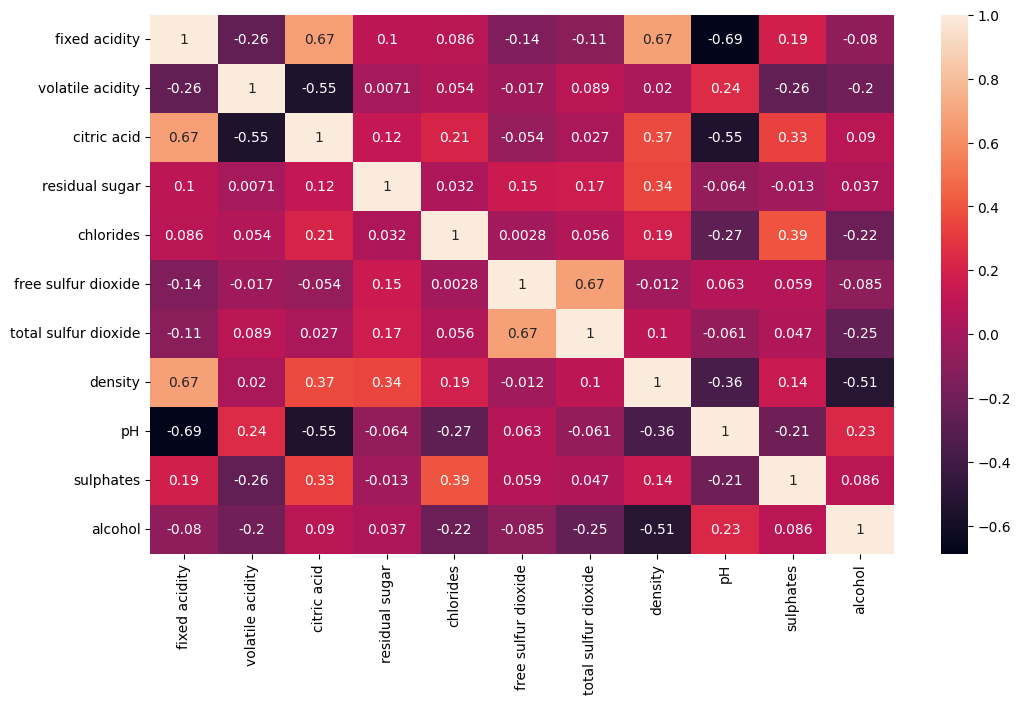

In [33]:
fig, ax = plt.subplots(figsize=(12,7))

sns.heatmap(temp_df.drop(['sulphates^2','quality'], axis=1).corr(), annot=True)
plt.show()

In [34]:
from sklearn.decomposition import PCA

pca = PCA(0.95)

In [35]:
X_pca = temp_df.drop(['quality'], axis=1)
Y_pca = temp_df['quality']

In [36]:
X_pca = pca.fit_transform(X_pca)

X_pca.shape

(1354, 2)

In [37]:
pca_x_train, pca_x_test, pca_y_train, pca_y_test = train_test_split(X_pca, Y_pca, random_state=42, test_size=0.2)

In [38]:
#Using PCA to try and reduce multicollinearity reduced the accuracy score even further. 

lr.fit(pca_x_train, pca_y_train)

accuracy_score(pca_y_test, (lr.predict(pca_x_test)))

0.8634686346863468